# **Lab One: Visualization and Data Preprocessing**

*Contributors:* Balaji Avvaru, Joshua Eysenbach, Vijay Kaniti, Daniel Turner

## **Business Understanding**

This analysis uses a dataset categorizing patients with a cardiovascular disease (CVD) diagnosis.  It contains a collection of 11 attributes that were gathered with the intention of trying to identify potential characteristics of individuals that correlate with heart disease. The primary goal of this analysis is to explore the data through statistical summaries and visualization to elucidate any trends that will be useful for building a prediction model for classifying a patient as having a CVD diagnosis or not.

This dataset was procured from Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) but it is unclear from where the original data originates. However, the features are described well enough to understand what each of them represents. In a practical "real-world" setting, verifying the source of this data and scrutinizing the methods of its collection would be a vital part of the analysis, but for the purposes of our academic interests in data visualization and eventual prediction modelling, this level of validity is inconsequential as long as the data has realistic characteristics and application.

Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels (Atherosclerosis) that can lead to a heart attack, chest pain (angina) or stroke. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias), congenital heart defects, and rheumatic heart disease. Four out of five CVD deaths are due to heart attacks and strokes. (https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118)

The goal of any prediction algorithm using this data is to determine if any of these attributes or combination of them can predict a cardiovascular disease diagnosis. These predicition models could provide valuable insight into what conditions or behaviors might be correlated with heart disease and could be used in aiding diagnosis or helping to mitigate the disease through understanding its possible causes. Many of the attributes collected are based on long standing suppositions of conditions or behaviors associated with heart disease like high cholesterol, smoking, or alcohol consumption. This analysis and subsequent prediction modelling can hopefully identify if any of these are more associated with (or even perhaps falsely attributed to) a diagnosis.

The effectiveness of a prediction model for classifying patients could be measured in several ways depending on the implementation. For example, the intent of the model could be to identify individuals likely to be diagnosed with cardiovascular disease so they can be given an objective reason to make behavioral changes to reduce their chances of a future diagnosis. In this case, maximizing sensitivity at the expense of accuracy and specificity might be the best option because there would be few downsides to making false positive classifications. AUC (Area under the curve; Receiver Operating Characteristic) could also be an effective metric under this principle as it measures the ability of the model to predict a higher score for positive examples. On the other hand, if something like high cholesterol was found to be a highly significant predictor and there was a decision to be made about prescribing a drug that could have side effects for the patient, accuracy and a more balanced sensitivity and specificity might be more important as false positives become more of a concern. For reasons like these, a few different prediction models might be warranted for different specific uses. 



## **Data Understanding**

### Data Meaning and Attribute Types

The features included are described on the Kaggle page for this data as being separable into three categories:
* *Objective*: Factual initial information about the patient;
* *Examination*: Information resulting from medical examination;
* *Subjective*: Information given by the patient.

Distinctions between the different attributes are paramount to interpreting and qualifying results of analysis and modelling of this data as they can represent varying degrees of validity and potential biases, so it is important that we keep this in mind as we explore the data and eventually make any recommendations. For example, we would likely assume blood pressure measurements will be reasonably accurate as they were taken by a trained health professional, but should be wary of a patient's proclivity to be honest when asked whether they are a regular smoker or drinker.

The attributes included in the dataset are outlined below per their descriptions on the Kaggle page.

|Attribute Name | Category | Description |
|---------------|----------|-------------|
|age | Objective | Age of the Patient (days) |
|height | Objective | Height of the Patient (cm) |
|weight | Objective | Weight of the Patient (kg) |
|gender | Objective | Gender of the Patient (1:M, 2:F)|
|ap_hi | Examination | Systolic blood pressure (mmHg)|
|ap_lo | Examination | Diastolic blood pressure (mmHg)|
|cholesterol | Examination | Cholesterol level -  1: normal, 2: above normal, 3: well above normal |
|gluc | Examination | Glucose level - 1: normal, 2: above normal, 3: well above normal |
|smoke | Subjective | Patient does (1) or does not (0) describe themselves as a smoker |
|alco | Subjective | Patient does (1) or does not (0) regularly drink alcohol |
|active | Subjective | Patient does (1) or does not (0) regularly exercise |
|cardio | Target Variable | Diagnosis of presence (1) or absence (0) of cardiovascular disease |

Most of these need little explanation, but we researched the attributes in the *Examination* category for a more in-depth understanding of their measurement and their known implications on cardiovascular disease and general heart health.

Blood Pressure is typically measured using an inflatable cuff with a gauge that meaures mmHg (pressure exerted by 1 mm high column of mercury). Measurements are taken that represent the maximum pressure exerted on arteries when the heart beats (systolic - higher) and between heart beats (diastolic - lower). The condition where either or both of these measurements is high called Hypertension, and this condition has been linked to cardiovascular disease. The American Heart Association outlines blood pressure levels by severity.

In [30]:
# https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
Image(url="https://raw.githubusercontent.com/jteysen/MSDS-7331-Machine-Learning-I/master/Data/bp.jpg", width=600)

Cholesterol is a type of fat found in blood that is both produced by the body and accumulated by ingesting foods with saturated fats. It is typically measured with a blood test and that gauges the saturation (in mg per dL of blood) of both high density and low density (considered to be the dangerous form in high concentrations) lipids. This dataset does not specifically detail what measurements represent the three levels of *normal*, *above normal*, and *well above normal*, but the American Heart Association claims the measurements considered normal and healthy vary with age, so the use of these 3 levels simplifies the use of cholesterol in any analysis and model building. 

Blood Glucose level, or the concentration of glucose in the bloodstream (also measured in mg/dL), is another attribute that has been recorded in this data with three levels. High glucose can be a sign of diabetes, another condition commonly associated with heart disease. An important consideration when analyzing glucose level is that its measurement can be highly variable as it depends heavily on how soon after a meal the test is taken. Since the severity of the glucose measurement is contigent on when the patient has last eaten, it is helpful that this data has normalized it to three levels, but we must be wary of potential inconsistencies we may not be privy to and consider that a doctor cannot be 100% sure that a patient has fasted as directed or appropriately informed the doctor of their last meal. The chart below based on guidelines from the American Diabetes Association illustrates the vast differences between expect blood sugar measurements depending on known cases of diabetes and time after eating.

In [31]:
# https://www.diabetesselfmanagement.com/blog/what-is-a-normal-blood-sugar-level
Image(url="https://raw.githubusercontent.com/jteysen/MSDS-7331-Machine-Learning-I/master/Data/bsugar.JPG", width=600)

### Data Quality Verification

#### Initial Import

The dataset acquired from Kaggle is stored for our use on Github. The code for importing the data is combined with the inital loading of various analysis and visualization packages below. 

In [8]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv("https://raw.githubusercontent.com/jteysen/MSDS-7331-Machine-Learning-I/master/Data/cardio_train.csv")

We can verify that the import was successful and get a preview of our data. The *.info()* command is used to view the current data type of each attribute.

In [48]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [39]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


The *.info()* command is used to view the current data type of each attribute.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


We can see that there are 70,000 observations and 13 total columns. Taking into account the ID field and the target variable (cardio), there are 11 attributes that could be used as predictor variables. Note that there are no missing values in the data as there are 70,000 non-null values for all attributes. This also indicates (along with what we saw from the *.head()* command) that since all attributes are integers (or floats) that the categorical information is already in a numeric coded form. Based on the attribute descriptions, we can group them by categorical and continuous variables for easier use with analysis tools.

In [65]:
# Continuous features
cont_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
# Categorical features
cat_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

Since the ID field is simply the ordered numbering of all of the observations, it is not useful to us so we will drop it from our data frame. This will also help to reduce the size of any pairwise comparisons.

In [66]:
df.drop(['id'], inplace=True, axis=1)

#### Initial Simple Statistics

We first run the simple statistics of the continuous variables to get some basic ideas about the data and check for reasonability of the observations. 

In [20]:
df[cont_features].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


The height and weight means are reasonable and the American Heart Association considers *normal* healthy blood pressure measurements to be 120/80 so their means appear reasonable as well. However, we can already identify obvious outlier issues for blood presssure by some of the impossible min and max values shown that go from negative to absurdly high, and some of the other extreme values (like the highly unlikely max for height of over eight feet) will need to be examined more closely. 

Interestingly, the medians and lower quartile for blood pressure are exactly 120/80. The fact that the medians are the same as the lower quartiles suggests that many subjects will be right at this "normal" range for blood pressure.

We also see that the scale of age in days is cumbersome and we will be able to make sense of ages more quickly if converted to years. The age range of 29 to 65 with a mean of 53 years is a fairly narrow scope; the prevalence of CVD is likely low amoung individuals younger than 29 but we could be missing a large component of the effects of age on CVD without data on patients older than 65.

#### Duplicate Records Check

The records are checked to see if any are exact duplicates. For this data, checking for duplicates could tell us how many patients have the exact same data but doesn't necessarily reveal if the records are erroneous duplicates or not. The ID field was removed before this operation since it appears arbitrarily built, but we can still check to see if the number of duplicates is reasonable. In  a sample of 70,000, it is not impossible for there to be individuals with the same information when the data is relatively common with only 11 statistics.

In [51]:
duplicate_observations = df[df.duplicated(keep='first')]

print("\nThere are {0} duplicated entries in the dataset!\n".format(len(duplicate_observations)))

print("Duplicate Rows based on all columns are :\n")
print(duplicate_observations)


There are 24 duplicated entries in the dataset!

Duplicate Rows based on all columns are :

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     16

All of the duplicates shown are for individuals very near the average or medians for the different attributes, so having 24 with the same attributes is entirely possible.

#### Outlier Detection

As we saw in the table of basic statistics, there are definitely some outliers in our data. We can view outliers using box plots and visualize the distributions of continous features with violin plots. As determined from the stat table, we will first convert age to years.

In [67]:
#we can convert the age to number of year instead of number of days 
df['age_years'] = (df['age'] / 365).round().astype('int')
# drop the feature 'age'
df.drop('age', axis=1, inplace=True)
# New Continuous features
cont_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']

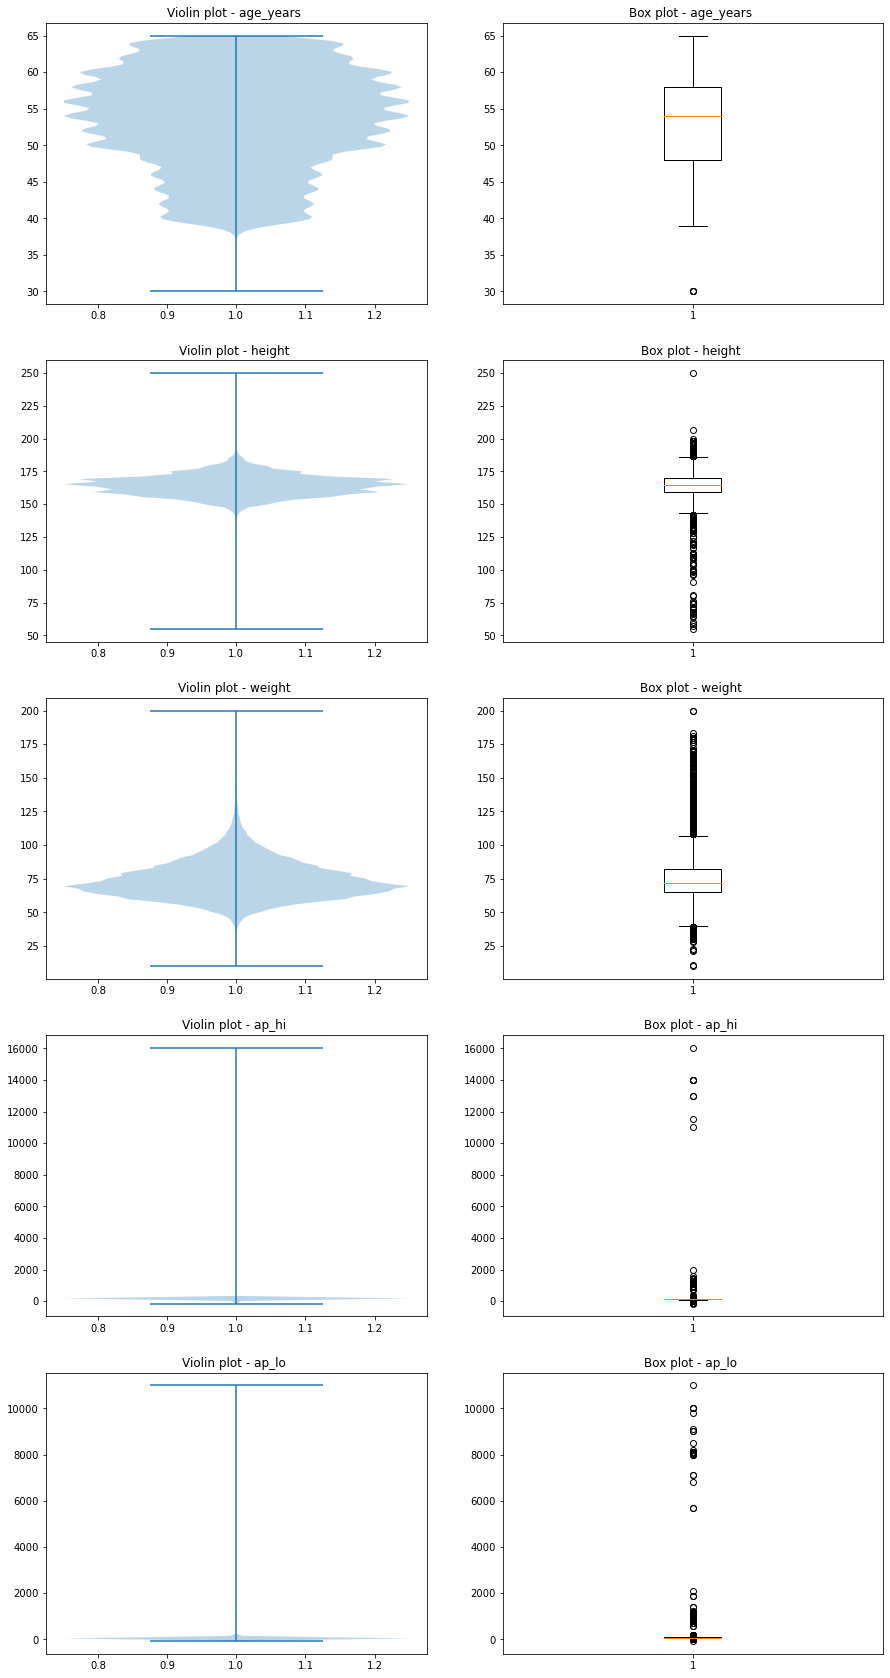

In [59]:
# Box and voilin plots of continuous features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
column = 0

def plot(axrow, x, y):    
    axrow[0].violinplot(x)
    axrow[0].set_title('Violin plot - {} '.format(cont_features[y]))
    
    axrow[1].boxplot(x)
    axrow[1].set_title('Box plot - {} '.format(cont_features[y]))
    
for row in axes:
    x = df[cont_features[column]]
    plot(row, x, column)    
    column = column+1

For age, we see that the lone 29 year old subject is a statistical outlier but not an unreasonable possibilty, so we'll leave it. The other continuous attributes appear to have wide spreads that make it difficult to discern where we should cut off outlying data. It will be difficult based on what we have to balance the removal of data based on being statistical outliers vs being just outlandish. We can't even see the distributions for blood pressure at the moment due to extremely high outliers.

From the simple statistics, box/violin plots and the heart.org Blood Pressure chart, we can see that there are some outliers (likely incorrectly entered) values for the features *Systolic blood pressure* and *Diastolic blood pressure*. We remove the observations with abnormal Systolic blood pressure and Diastolic blood pressure observations.

**** **We need to decide how we want to do this such that we lose a little good data as possible**   ****

**Use specific cutoffs instead of quartile ranges? difficult to pinpoint where the data gets crappy on quartiles**

Also need to remove outliers for height and weight - cutoff at 120 cm?

In [88]:
df2 = df[(df["ap_lo"] < 140) & (df["ap_lo"] > 20)]
df2 = df2[(df["ap_hi"] < 220) & (df2["ap_hi"] > 40)]

print(df2[['ap_lo', 'ap_hi']].describe())

              ap_lo         ap_hi
count  68698.000000  68698.000000
mean      81.305395    126.572753
std        9.439463     16.595382
min       30.000000     60.000000
25%       80.000000    120.000000
50%       80.000000    120.000000
75%       90.000000    140.000000
max      135.000000    215.000000


For the height attribute, we will remove the 250cm giant from the data. The unreasonably short records could be from entry errors stemming from accidental unit confusion. For example, the minimum of 55 cm could have been an erroneous entry for 5ft 5 inches. We will use the cutoff of 120 cm (approx 4 ft) for the lower end of heights.

In [94]:
df2 = df2[(df2["height"] < 250)]
df2 = df2[(df2["height"] > 120)]
print(df2[['height']].describe())

             height
count  68615.000000
mean     164.433520
std        7.856655
min      122.000000
25%      159.000000
50%      165.000000
75%      170.000000
max      207.000000


This appears to be a good cutoff for height as it did not eliminate too many observations.

After removing Outliers, we can re-run the box plots and violin plots to see how the distributions changed.

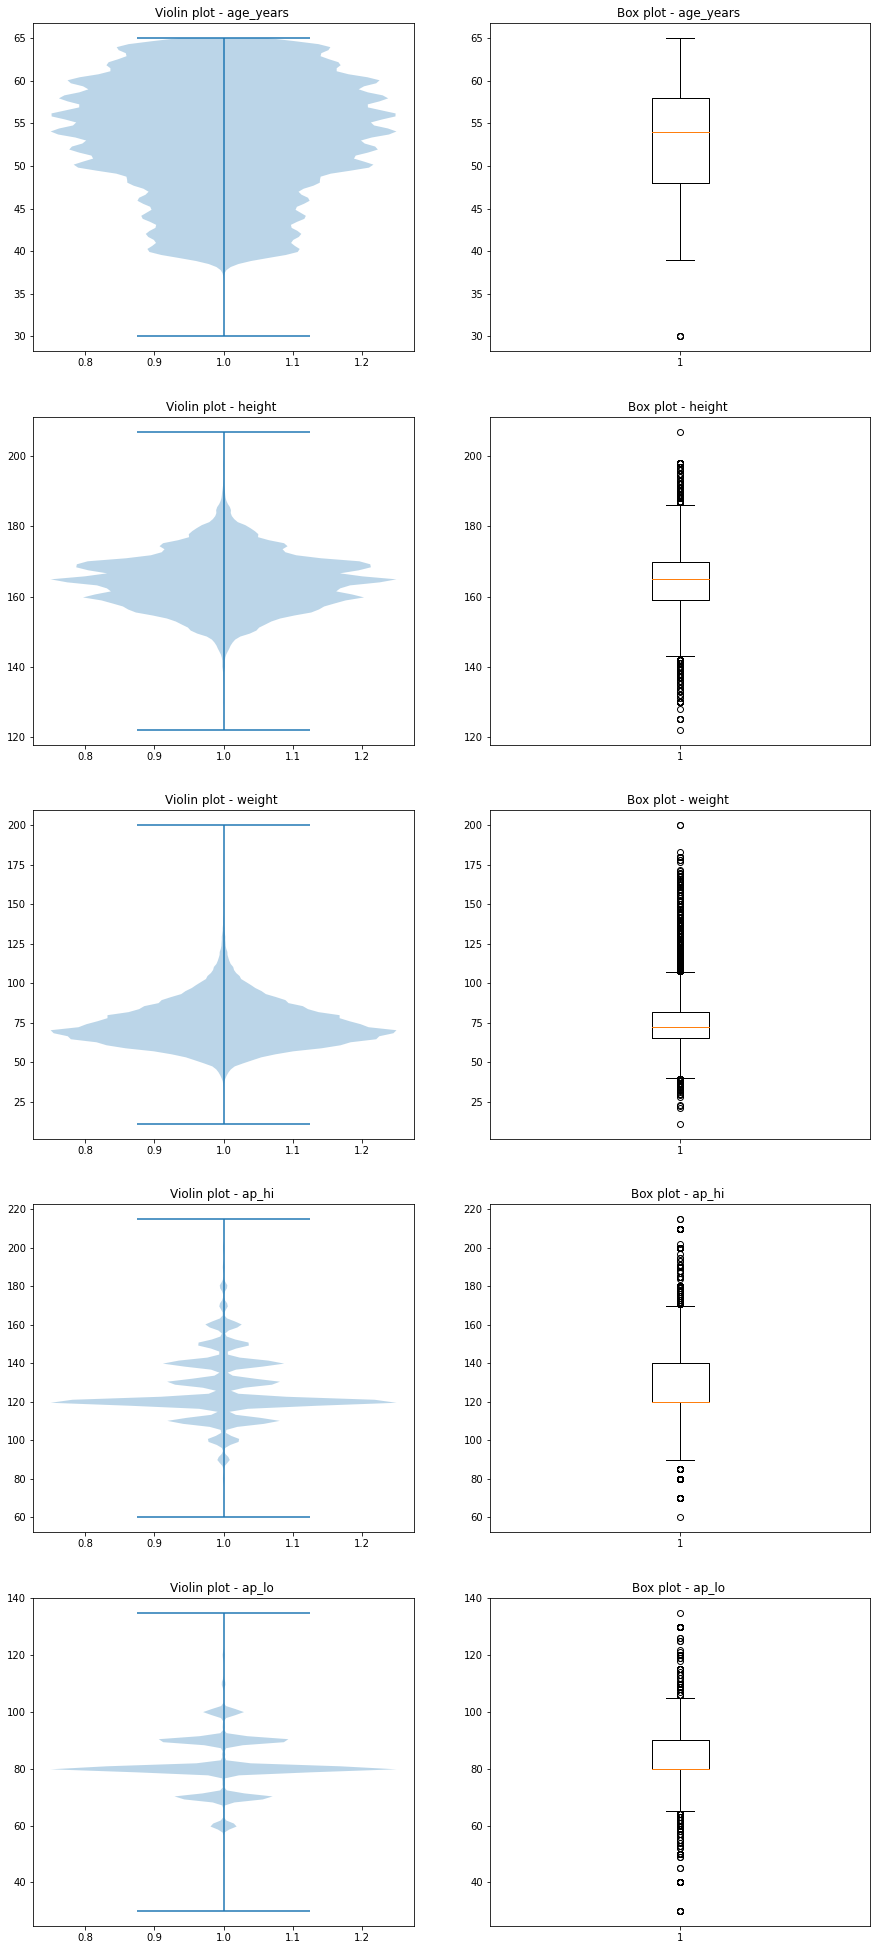

In [96]:
# Box and voilin plots of continuous features Systolic blood pressure and Diastolic blood pressure after 
# removing the outliers
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 35))
column = 0

def plot(axrow, x, y):    
    axrow[0].violinplot(x)
    axrow[0].set_title('Violin plot - {} '.format(cont_features[y]))
    
    axrow[1].boxplot(x)
    axrow[1].set_title('Box plot - {} '.format(cont_features[y]))
    
for row in axes:
    x = df2[cont_features[column]]
    plot(row, x, column)    
    column = column+1